In [1]:
import torch
print(torch.__version__)


2.4.0


In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torchvision

C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\Devi B


In [4]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [5]:

def load_images(image_paths):
    images = []
    for img_path in tqdm(image_paths):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)
            images.append(img)
        else:
            print(f"Warning: Unable to read image {img_path}")
    return images


In [6]:
def create_image_dataframe(base_dir):
    data = []
    for label, subdir in [("Angel meriba", os.path.join(base_dir, "Angel meriba")), ("Ramya", os.path.join(base_dir, "Ramya")),("Devi", os.path.join(base_dir, "Devi"))]:
        for image_path in glob(os.path.join(subdir, "*.jpg")):
            data.append({"image_path": image_path, "label": label})
    df = pd.DataFrame(data)
    return df

In [45]:
base_dir = r"C:\Users\Devi B\Desktop\dataset\Devi"

In [46]:
def create_image_dataframe(base_dir):
    data = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
                file_path = os.path.join(subdir, file)
                label = os.path.basename(subdir)
                data.append((file_path, label))
    df = pd.DataFrame(data, columns=['file_path', 'label'])
    return df

In [43]:
data.head()

,file_path,label
0,C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...,Devi
1,C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...,Devi
2,C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...,Devi
3,C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...,Devi
4,C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...,Devi


Directory C:\Users\Devi B\Desktop\dataset\angel meriba does not exist.
First few rows of the DataFrame:
                                           file_path label
0  C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...  Devi
1  C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...  Devi
2  C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...  Devi
3  C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...  Devi
4  C:\Users\Devi B\Desktop\dataset\Devi\WhatsApp ...  Devi
Unique labels in the DataFrame:
['Devi' 'ramya']


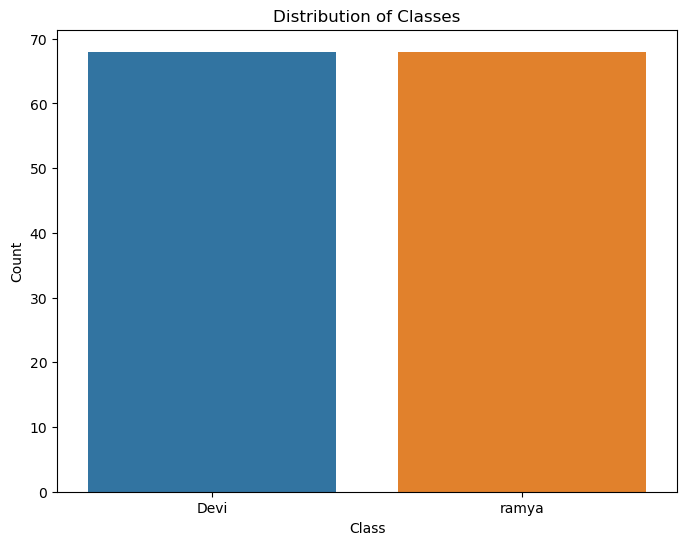

In [48]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base directory containing the class folders
base_dir = r"C:\Users\Devi B\Desktop\dataset"

# Define a function to create a DataFrame from the image directories
def create_image_dataframe(base_dir, classes):
    data = []
    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
                    file_path = os.path.join(class_dir, file)
                    data.append((file_path, class_name))
        else:
            print(f"Directory {class_dir} does not exist.")
    df = pd.DataFrame(data, columns=['file_path', 'label'])
    return df

# Specify the classes you want to include
classes = ['Devi', 'angel meriba', 'ramya']

# Create the DataFrame
data = create_image_dataframe(base_dir, classes)

# Check the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Check the unique labels in the DataFrame
print("Unique labels in the DataFrame:")
print(data['label'].unique())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


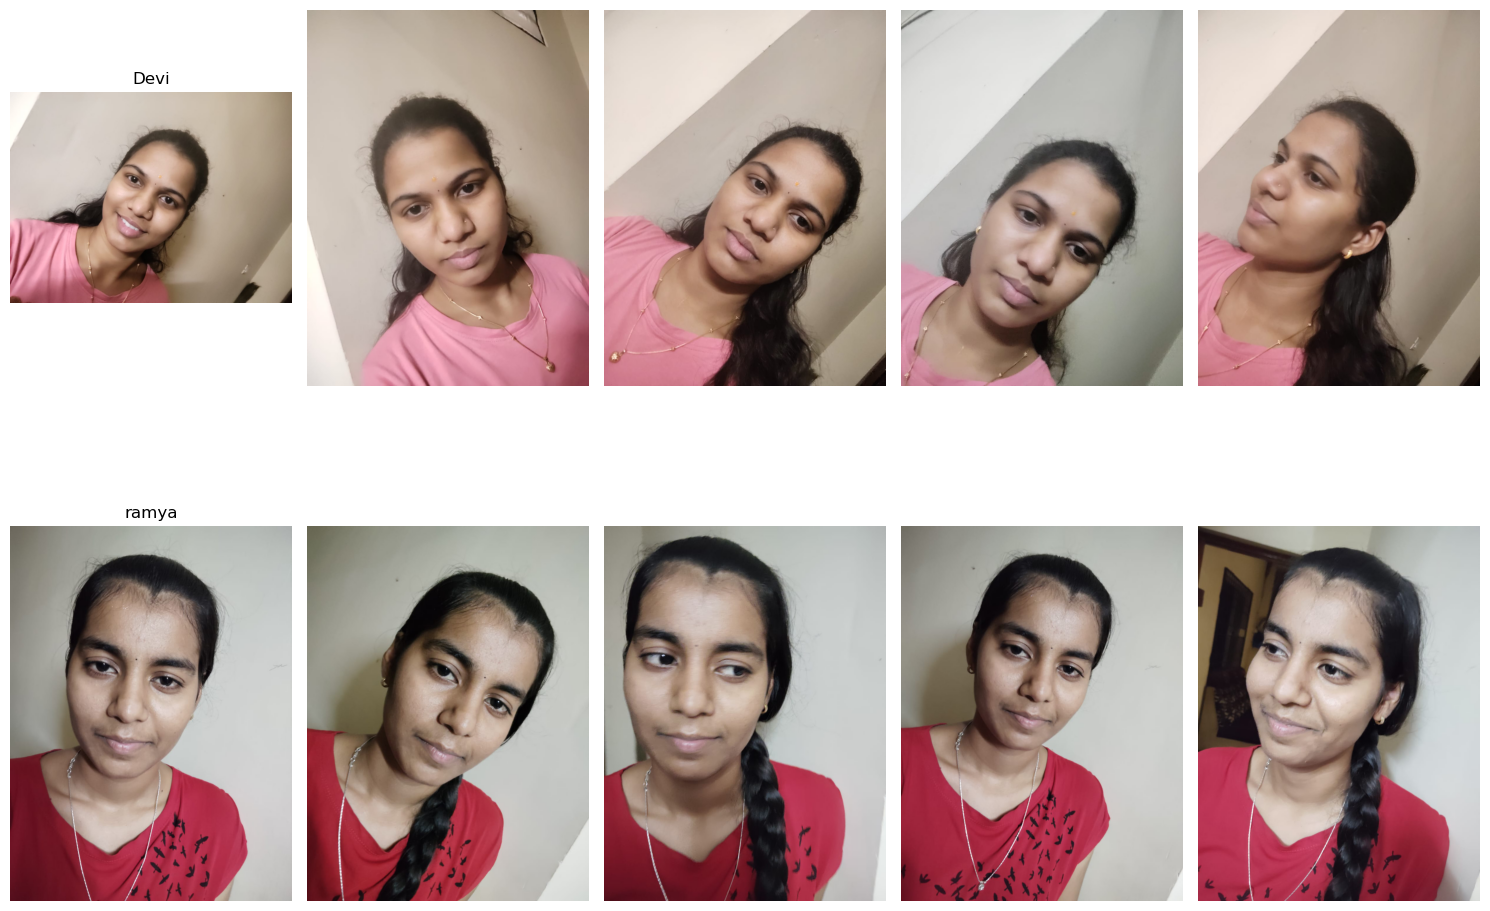

In [50]:
def show_examples(df, num_examples=5):
    classes = df['label'].unique()
    fig, axs = plt.subplots(len(classes), num_examples, figsize=(15, 6 * len(classes)))

    for i, label in enumerate(classes):
        examples = df[df['label'] == label].sample(min(num_examples, len(df[df['label'] == label])))
        for j in range(num_examples):
            if j < len(examples):
                image_path = examples.iloc[j]['file_path']
                img = Image.open(image_path)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')
                if j == 0:
                    axs[i, j].set_title(label)
            else:
                axs[i, j].axis('off')  # Turn off axes if there are not enough images

    plt.tight_layout()
    plt.show()

# Example usage
show_examples(data)

In [51]:
data['label'].value_counts()

label
Devi     68
ramya    68
Name: count, dtype: int64

In [53]:
X = data['file_path']  
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.map({'devi': 0, 'ramya': 1}).values
y_test = y_test.map({'devi': 0, 'ramya': 1}).values

In [54]:
train_images = load_images(X_train)
test_images = load_images(X_test)

transform = transforms.Compose([
    transforms.Resize((128, 128)),# Resizing the images
    transforms.RandomHorizontalFlip(),
    # Stabilizing the Images
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),# Enhancing the Images
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),# normaliation
])


100%|███████████████████████████████████████| 28/28 [00:01<00:00, 14.63it/s]


In [55]:
def load_and_transform_image(file_path, transform):
    image = Image.open(file_path).convert('RGB')
    transformed_image = transform(image)
    return transformed_image

In [56]:
def plot_images(original_image, transformed_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    transformed_image = transformed_image.permute(1, 2, 0).numpy()
    transformed_image = transformed_image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # De-normalize
    transformed_image = transformed_image.clip(0, 1)
    axs[1].imshow(transformed_image)
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')
    plt.show()

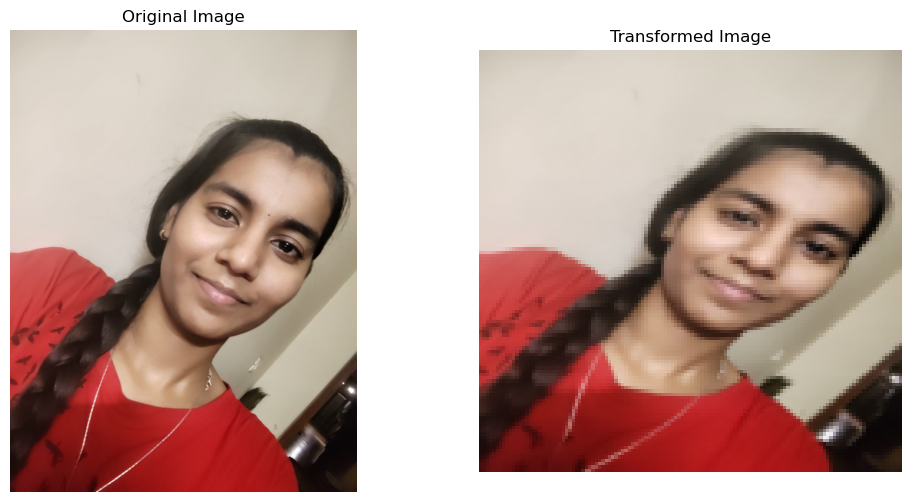

In [58]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Define a function to load and apply transformations to an image
def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    transformed_image = transform(image)
    return transformed_image

# Define a function to plot original and transformed images
def plot_images(original_image, transformed_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].imshow(original_image)
    axs[0].axis('off')
    axs[0].set_title('Original Image')
    
    axs[1].imshow(transformed_image.permute(1, 2, 0))  # Convert tensor to image format
    axs[1].axis('off')
    axs[1].set_title('Transformed Image')
    
    plt.show()

# Correct image path
sample_image_path = r"C:\Users\Devi B\Desktop\dataset\Ramya\WhatsApp Image 2024-08-01 at 10.09.19 PM.jpeg"

# Load and transform the image
original_image = Image.open(sample_image_path).convert('RGB')
transformed_image = load_and_transform_image(sample_image_path, transform)

# Plot the images
plot_images(original_image, transformed_image)

In [59]:
train_dataset = CustomDataset(train_images, y_train, transform=transform)
test_dataset = CustomDataset(test_images, y_test, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Labels: tensor([                   1, -9223372036854775808, -9223372036854775808,
        -9223372036854775808, -9223372036854775808, -9223372036854775808,
        -9223372036854775808,                    1])
Classes: ['devi', 'ramya']


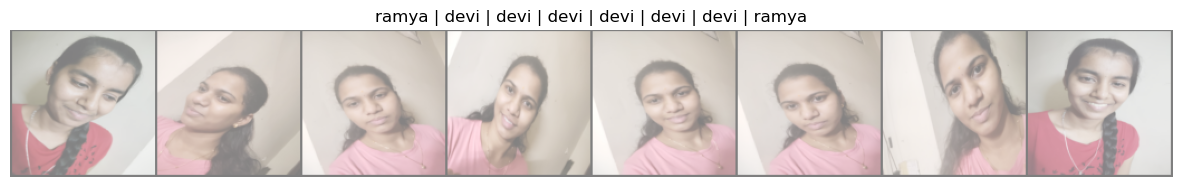

In [69]:
def imshow(img, title=None):
    # Unnormalize if images were normalized
    img = img / 2 + 0.5  # Assuming the images were normalized to [-1, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off')

def plot_batch_of_images(dataloader, classes, num_images=8):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)
    
    # Adjust num_images if there are fewer images in the batch
    num_images = min(num_images, len(images))
    
    out = torchvision.utils.make_grid(images[:num_images], nrow=num_images)
    plt.figure(figsize=(15, 15))
    
    # Print debug information
    print("Labels:", labels[:num_images])
    print("Classes:", classes)
    
    # Convert labels to class names with error handling
    titles = []
    for label in labels[:num_images]:
        label = label.item()  # Convert tensor to Python scalar
        if isinstance(label, int) and 0 <= label < len(classes):
            titles.append(classes[label])
        else:
            titles.append(f"devi")  # Handle out-of-bounds or invalid labels
    
    imshow(out, title=' | '.join(titles))
    plt.show()

# Example usage
# Assuming you have a DataLoader named train_loader
classes = ['devi', 'ramya']  # Ensure this matches the indices used in the dataset
plot_batch_of_images(train_loader, classes)


In [70]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Devi B\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Devi B/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████████████████████████████| 44.7M/44.7M [00:04<00:00, 11.1MB/s]


In [71]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define your model, criterion, optimizer, and scheduler
model =  models.resnet18(pretrained=True)# Define your model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Example scheduler

# Define the number of classes
num_classes = 2  # Adjust according to your dataset

def clean_labels(labels, num_classes):
    # Replace invalid labels with a default valid value or exclude them
    valid_labels = (labels >= 0) & (labels < num_classes)
    labels = torch.where(valid_labels, labels, torch.tensor(0, dtype=labels.dtype))  # Default to class 0
    return labels

def inspect_labels(dataloader):
    for images, labels in dataloader:
        print("Sample labels:", labels)
        if torch.any(labels < 0) or torch.any(labels >= num_classes):
            print("Invalid label detected")
            break
        break

def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off')

def plot_batch_of_images(dataloader, classes, num_images=8):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)
    num_images = min(num_images, len(images))
    out = torchvision.utils.make_grid(images[:num_images], nrow=num_images)
    plt.figure(figsize=(15, 15))
    titles = [classes[label] if label < len(classes) else f"Unknown ({label})" for label in labels[:num_images]]
    imshow(out, title=' | '.join(titles))
    plt.show()

def show_examples(df, num_examples=5):
    fig, axs = plt.subplots(2, num_examples, figsize=(15, 6))
    classes = df['label'].unique()
    for i, label in enumerate(classes):
        examples = df[df['label'] == label].sample(num_examples)
        for j, image_path in enumerate(examples['image_path']):
            img = Image.open(image_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(label)
    plt.show()

def plot_images(original_image, transformed_image):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(transformed_image)
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')
    plt.show()

def load_and_transform_image(image_path, transform):
    image = Image.open(image_path).convert('RGB')
    return transform(image)

# Example usage of the training loop
n_epochs = 15
epoch_losses = []

for epoch in tqdm.tqdm(range(n_epochs), desc='Epochs'):
    model.train()
    running_loss = 0.0
    
    for images, labels in tqdm.tqdm(train_loader, desc=f'Epoch {epoch + 1}/{n_epochs}', leave=False):
        optimizer.zero_grad()
        outputs = model(images)
        
        # Clean labels
        labels = clean_labels(labels, num_classes)
        
        try:
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        except IndexError as e:
            print(f"Error: {e}")
            print("Outputs:", outputs)
            print("Labels:", labels)
            break  # Break the loop to stop further errors
    
    # Step the learning rate scheduler
    scheduler.step()
    
    # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    
    # Print the loss for this epoch
    tqdm.tqdm.write(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss:.4f}")


Epochs:   7%|██▏                             | 1/15 [00:08<01:55,  8.26s/it]

Epoch 1/15, Loss: 4.3224



Epochs:  13%|████▎                           | 2/15 [00:16<01:45,  8.11s/it]

Epoch 2/15, Loss: 0.0212



Epochs:  20%|██████▍                         | 3/15 [00:23<01:33,  7.83s/it]

Epoch 3/15, Loss: 0.0003



Epochs:  27%|████████▌                       | 4/15 [00:30<01:22,  7.50s/it]

Epoch 4/15, Loss: 0.0001



Epochs:  33%|██████████▋                     | 5/15 [00:37<01:13,  7.34s/it]

Epoch 5/15, Loss: 0.0001



Epochs:  40%|████████████▊                   | 6/15 [00:45<01:08,  7.59s/it]

Epoch 6/15, Loss: 0.0000



Epochs:  47%|██████████████▉                 | 7/15 [00:53<01:01,  7.73s/it]

Epoch 7/15, Loss: 0.0000



Epochs:  53%|█████████████████               | 8/15 [01:02<00:55,  7.92s/it]

Epoch 8/15, Loss: 0.0000



Epochs:  60%|███████████████████▏            | 9/15 [01:10<00:48,  8.04s/it]

Epoch 9/15, Loss: 0.0001



Epochs:  67%|████████████████████▋          | 10/15 [01:18<00:39,  7.99s/it]

Epoch 10/15, Loss: 0.0000



Epochs:  73%|██████████████████████▋        | 11/15 [01:26<00:31,  7.97s/it]

Epoch 11/15, Loss: 0.0000



Epochs:  80%|████████████████████████▊      | 12/15 [01:34<00:23,  7.99s/it]

Epoch 12/15, Loss: 0.0001



Epochs:  87%|██████████████████████████▊    | 13/15 [01:42<00:16,  8.04s/it]

Epoch 13/15, Loss: 0.0000



Epochs:  93%|████████████████████████████▉  | 14/15 [01:50<00:08,  8.08s/it]

Epoch 14/15, Loss: 0.0000



Epochs: 100%|███████████████████████████████| 15/15 [01:58<00:00,  7.93s/it]

Epoch 15/15, Loss: 0.0000


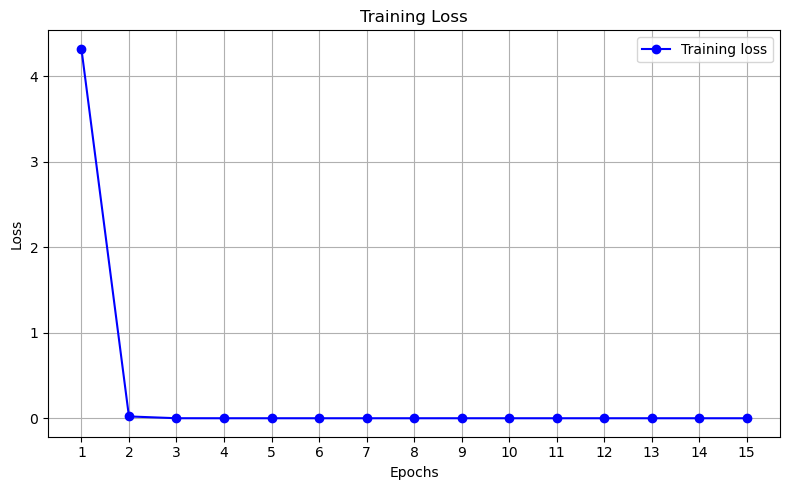

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, n_epochs + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
torch.save(model.state_dict(), 'project_classifier.pth')

In [79]:
model.load_state_dict(torch.load('project_classifier.pth'))
model.eval()

C:\Users\Devi B\AppData\Local\Temp\ipykernel_16316\1956961125.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('project_classifier.pth'))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [80]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [82]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        temp, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 32.14%


In [85]:
import matplotlib.pyplot as plt

The predicted class for the image is: Ramya


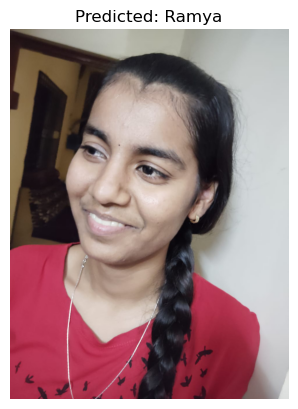

In [89]:
# Define the transformation to match the training data preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def load_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

def predict_image(model, image_path):
    image = load_image(image_path)
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return "Devi" if predicted.item() == 0 else "Ramya"

def plot_image(image_path, prediction):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = r"C:\Users\Devi B\Desktop\dataset\Ramya\WhatsApp Image 2024-08-01 at 10.18.10 PM.jpeg"
prediction = predict_image(model, image_path)
print(f'The predicted class for the image is: {prediction}')
plot_image(image_path, prediction)